# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Carregar os dados
df = pd.read_csv('cliente_preparado.csv')


In [90]:
# Verificar tipos de dados e valores ausentes
print(df.dtypes)
print(df.isnull().sum())

# Encoding de variáveis categóricas (se necessário)
# df = pd.get_dummies(df, columns=['sexo', 'posse_de_veiculo', ...])

# Separar features e target
X = df.drop('mau', axis=1)
y = df['mau']

# Escalonar os dados (opcional)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Verificar a proporção das classes em cada conjunto
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

qtd_filhos                                  int64
idade                                     float64
tempo_emprego                             float64
possui_celular                              int64
possui_fone_comercial                       int64
possui_fone                                 int64
possui_email                                int64
qt_pessoas_residencia                     float64
mau                                          bool
sexo_M                                       bool
posse_de_veiculo_Y                           bool
posse_de_imovel_Y                            bool
tipo_renda_Pensioner                         bool
tipo_renda_State servant                     bool
tipo_renda_Student                           bool
tipo_renda_Working                           bool
educacao_Higher education                    bool
educacao_Incomplete higher                   bool
educacao_Lower secondary                     bool
educacao_Secondary / secondary special       bool


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

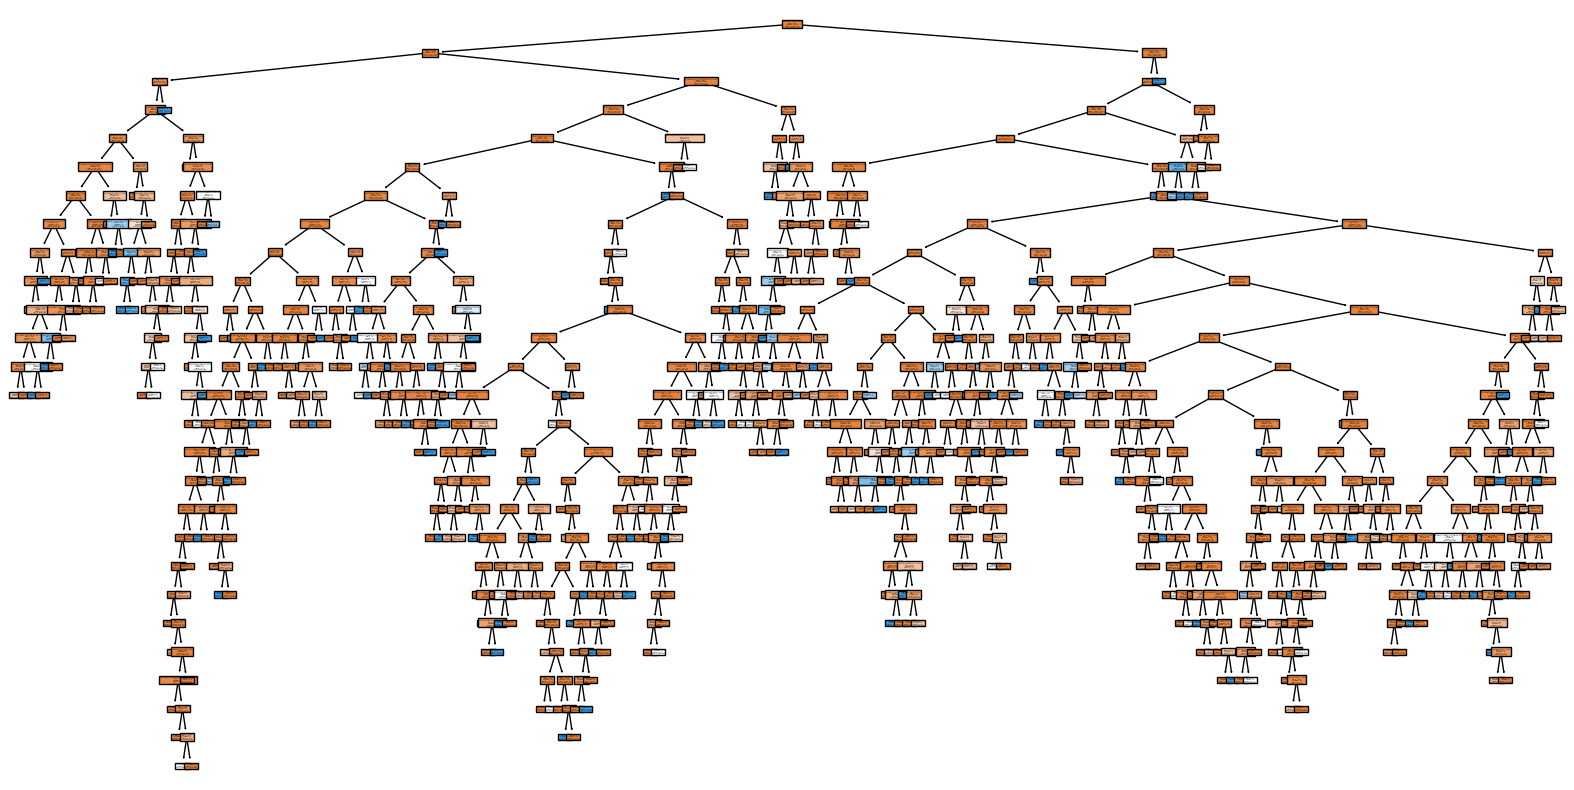

Acurácia na base de treinamento: 0.9905619905619906


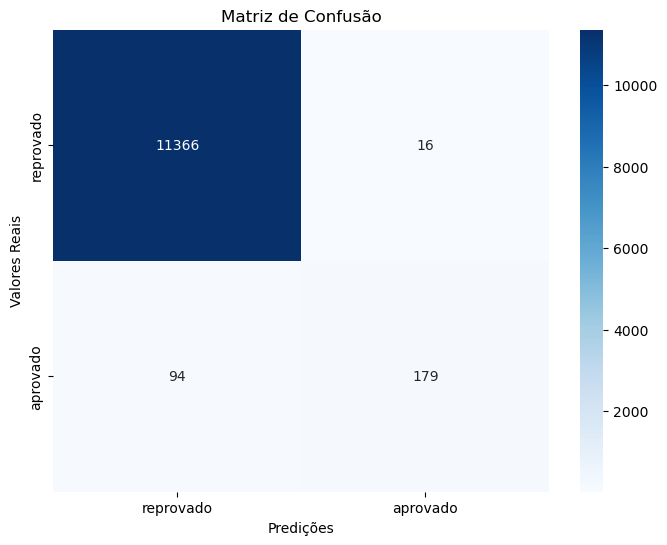

In [94]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Criando um objeto da árvore de decisão
clf = DecisionTreeClassifier(random_state=42)

# Treinando o modelo
clf.fit(X_train, y_train)

# Visualizando a árvore (ajustando o tamanho da figura)
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['reprovado', 'aprovado'])
plt.show()

# Fazendo previsões na base de treinamento
y_pred_train = clf.predict(X_train)

# Calculando a acurácia na base de treinamento
accuracy = accuracy_score(y_train, y_pred_train)
print("Acurácia na base de treinamento:", accuracy)

# Criando a matriz de confusão
conf_matrix = confusion_matrix(y_train, y_pred_train)
# Visualizando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["reprovado", "aprovado"],
            yticklabels=["reprovado", "aprovado"])
plt.xlabel('Predições')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão')
plt.show()

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

Acurácia na base de teste: 0.9735735735735735


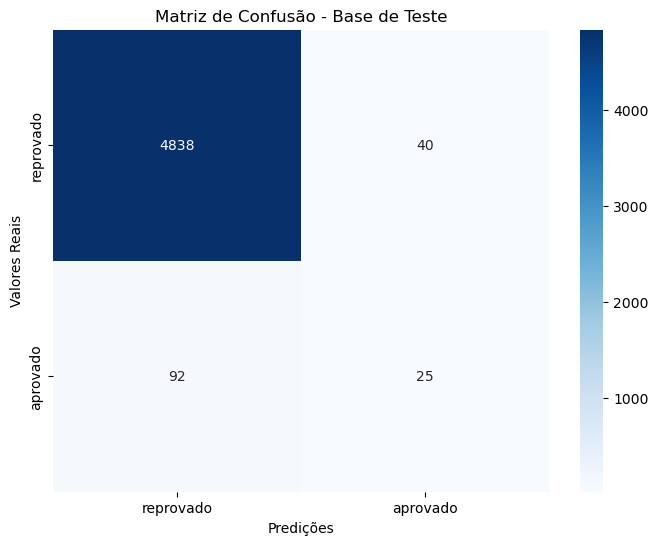

In [96]:
# Fazendo previsões na base de teste
y_pred_test = clf.predict(X_test)

# Calculando a acurácia na base de teste
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Acurácia na base de teste:", accuracy_test)

# Criando a matriz de confusão para a base de teste
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
# Visualizando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues",
            xticklabels=["reprovado", "aprovado"],
            yticklabels=["reprovado", "aprovado"])
plt.xlabel('Predições')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão - Base de Teste')
plt.show()

In [97]:
# Nova árvore com hiperparâmetros ajustados
clf_new = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
clf_new.fit(X_train, y_train)

# Fazendo previsões e calculando a matriz de confusão
y_pred_test_new = clf_new.predict(X_test)
conf_matrix_new = confusion_matrix(y_test, y_pred_test_new)

# Calculando a proporção de proponentes classificados como 'maus'
prop_maus = (conf_matrix_new[0, 0] + conf_matrix_new[0, 1]) / len(y_test)
print("Proporção de proponentes classificados como 'maus':", prop_maus)

Proporção de proponentes classificados como 'maus': 0.9765765765765766


In [98]:
# Classificando todos como 'bons'
y_pred_all_bons = np.ones(len(y_test))

# Calculando a acurácia
accuracy_all_bons = accuracy_score(y_test, y_pred_all_bons)
print("Acurácia classificando todos como 'bons':", accuracy_all_bons)

Acurácia classificando todos como 'bons': 0.023423423423423424
